# Visualization of kmer counts: mean-variance relationship

In [1]:
suppressMessages(suppressWarnings(source("config.R")))
FD_WRK

[1] "/work/kk319"

In [2]:
FD_DAT=file.path(FD_WRK, "out/CombEffect_STARR/kmer")
Sys.glob(file.path(FD_DAT, "dat_cnt*"))

[1] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dex_per1.csv"  
[2] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dmso_per1.csv" 
[3] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_input_per1.csv"

## Import count tables

In [3]:
### import data
dat_cnt_input_per1 = read_csv(file.path(FD_DAT, "dat_cnt_input_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  Input1 = col_double(),
  Input2 = col_double(),
  Input3 = col_double(),
  Input4 = col_double(),
  Input5 = col_double()
)


In [4]:
dat_cnt_dmso_per1  = read_csv(file.path(FD_DAT, "dat_cnt_dmso_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  TFX2_DMSO = col_double(),
  TFX3_DMSO = col_double(),
  TFX4_DMSO = col_double(),
  TFX5_DMSO = col_double()
)


In [5]:
dat_cnt_dex_per1   = read_csv(file.path(FD_DAT, "dat_cnt_dex_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  TFX2_Dex = col_double(),
  TFX3_Dex = col_double(),
  TFX4_Dex = col_double(),
  TFX5_Dex = col_double()
)


## Preprocessing

In [6]:
head(dat_cnt_input_per1)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5
chr17,8148000,8148750,2,NA,3,7,4
chr17,8148005,8148755,1,1,3,6,4
chr17,8148010,8148760,1,1,3,6,3
chr17,8148015,8148765,1,1,3,5,3
chr17,8148020,8148770,1,3,4,5,3
chr17,8148025,8148775,1,3,5,5,3


## count coverage (INPUT)

In [7]:
dat = dat_cnt_input_per1
dat = dat %>% gather(Sample, Value, -Chrom, -Start, -End)
head(dat)

Chrom,Start,End,Sample,Value
chr17,8148000,8148750,Input1,2
chr17,8148005,8148755,Input1,1
chr17,8148010,8148760,Input1,1
chr17,8148015,8148765,Input1,1
chr17,8148020,8148770,Input1,1
chr17,8148025,8148775,Input1,1


Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1255 rows containing missing values (geom_point).”

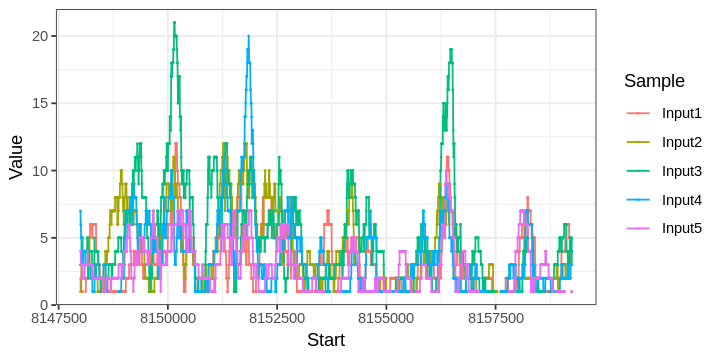

In [8]:
gpt = ggplot(dat, aes(x=Start, y=Value, color=Sample)) + 
    geom_line() +
    geom_point(size=0.1) + 
    theme_bw()

options(repr.plot.height=3, repr.plot.width=6)
print(gpt)

## count coverage (DMSO)

In [9]:
dat = dat_cnt_dmso_per1
dat = dat %>% gather(Sample, Value, -Chrom, -Start, -End)
head(dat)

Chrom,Start,End,Sample,Value
chr17,8148000,8148750,TFX2_DMSO,11
chr17,8148005,8148755,TFX2_DMSO,12
chr17,8148010,8148760,TFX2_DMSO,12
chr17,8148015,8148765,TFX2_DMSO,12
chr17,8148020,8148770,TFX2_DMSO,12
chr17,8148025,8148775,TFX2_DMSO,12


Warning message:
“Removed 124 rows containing missing values (geom_path).”Warning message:
“Removed 1028 rows containing missing values (geom_point).”

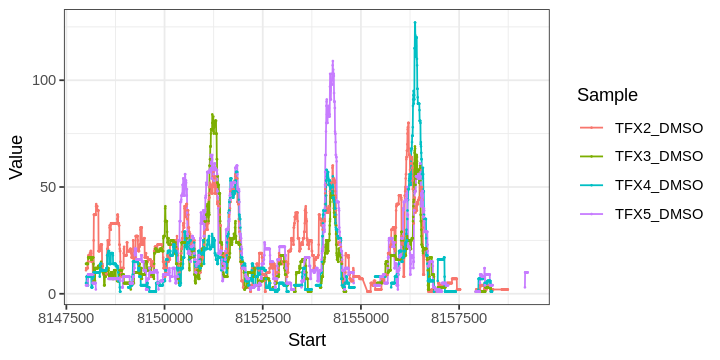

In [10]:
gpt = ggplot(dat, aes(x=Start, y=Value, color=Sample)) + 
    geom_line() +
    geom_point(size=0.1) + 
    theme_bw()

options(repr.plot.height=3, repr.plot.width=6)
print(gpt)

## count distribution (INPUT)

In [11]:
mat = dat_cnt_input_per1 %>% dplyr::select(-Chrom, -Start, -End)
head(mat,3)

Input1,Input2,Input3,Input4,Input5
2,NA,3,7,4
1,1,3,6,4
1,1,3,6,3


In [12]:
dat = mat %>% gather(Sample, Value)
print(dim(dat))

dat = dat %>% na.omit
print(dim(dat))

[1] 11180     2
[1] 9925    2


In [13]:
print(mean(dat$Value))
print(var(dat$Value))

[1] 3.972191
[1] 8.567949


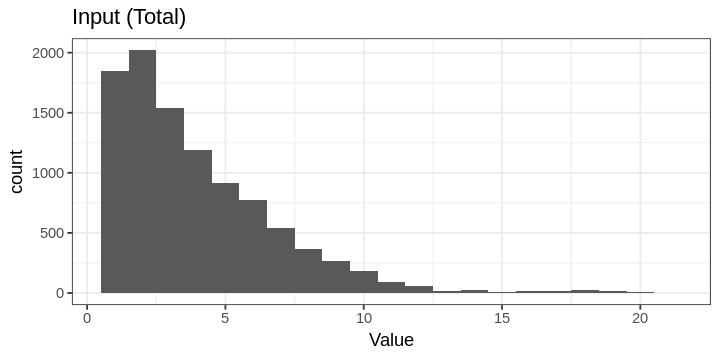

In [14]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=Value)) + 
    geom_histogram(binwidth = 1) + 
    theme_bw() + 
    labs(title="Input (Total)")

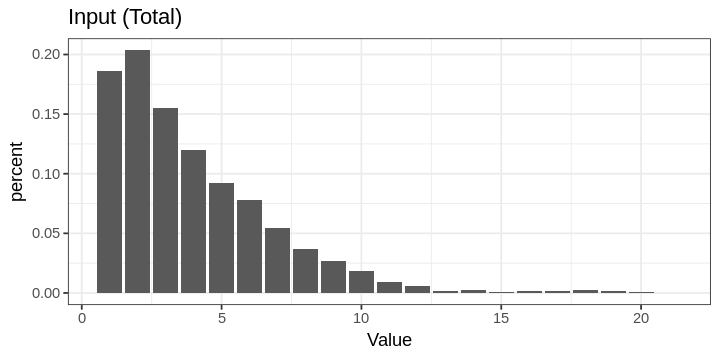

In [15]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=Value)) + 
    geom_bar(aes(y = (..count..)/sum(..count..))) + 
    theme_bw() + 
    labs(title="Input (Total)", y="percent")

In [16]:
### dispersion phi = mu^2 / (var - mu)
get_dispersion = function(m, v){return(m^2 / (v - m))}

In [17]:
m = mean(dat$Value)
v = var(dat$Value)
x = MASS::rnegbin(n=2000, mu = m, theta = get_dispersion(m, v))
table(x)

x
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  20 
142 284 315 325 257 224 140  75  85  47  40  23  18   4   9   6   1   1   1   1 
 21 
  2 

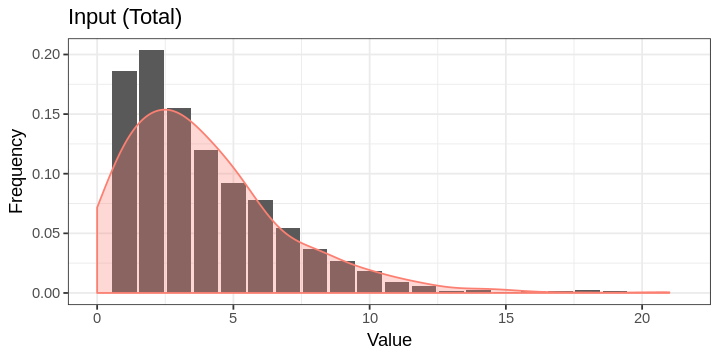

In [18]:
tmp = data.frame(x)

options(repr.plot.height=3, repr.plot.width=6)
ggplot() + 
    geom_bar(data=dat, aes(x=Value, y=(..count..)/sum(..count..))) + 
    geom_density(data=tmp, aes(x=x), 
                 adjust = 2,
                 fill="#fb8072", 
                 color="#fb8072", 
                 alpha=0.3) +
    labs(title="Input (Total)", y="Frequency") +    
    theme_bw()

## calculate mean and variance (DMSO)

In [19]:
mat = dat_cnt_dmso_per1 %>% dplyr::select(-Chrom, -Start, -End)
head(mat,3)

TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
11,14,5,4
12,14,5,4
12,14,5,4


In [20]:
dat = mat %>% gather(Sample, Value)
print(dim(dat))

dat = dat %>% na.omit
print(dim(dat))

[1] 8076    2
[1] 7048    2


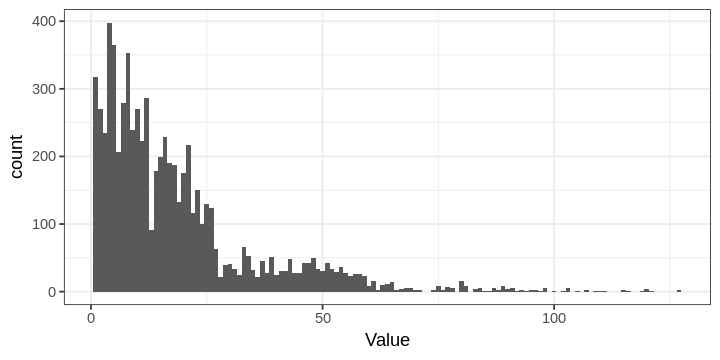

In [21]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=Value)) + geom_histogram(binwidth = 1) + theme_bw()

In [22]:
m = mean(dat$Value)
v = var(dat$Value)
x = MASS::rnegbin(n=5000, mu = m, theta = get_dispersion(m, v))

print(m)
print(v)

[1] 18.47673
[1] 308.7748


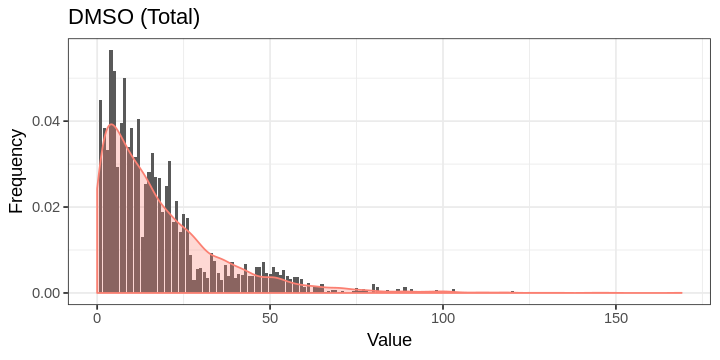

In [23]:
tmp = data.frame(x)

options(repr.plot.height=3, repr.plot.width=6)
ggplot() + 
    geom_bar(data=dat, aes(x=Value, y=(..count..)/sum(..count..))) + 
    geom_density(data=tmp, aes(x=x), 
                 adjust = 1,
                 fill="#fb8072", 
                 color="#fb8072", 
                 alpha=0.3) +
    labs(title="DMSO (Total)", y="Frequency") +    
    theme_bw()

## distribution of output/input ratio

In [24]:
head(dat_cnt_input_per1, 3)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5
chr17,8148000,8148750,2,NA,3,7,4
chr17,8148005,8148755,1,1,3,6,4
chr17,8148010,8148760,1,1,3,6,3


In [25]:
head(dat_cnt_dmso_per1, 3)

Chrom,Start,End,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
chr17,8148000,8148750,11,14,5,4
chr17,8148005,8148755,12,14,5,4
chr17,8148010,8148760,12,14,5,4


In [32]:
df1 = dat_cnt_dmso_per1
df2 = dat_cnt_input_per1

dat = left_join(df1, df2, by=c("Chrom", "Start", "End"))
dat = dat %>% mutate(
    ratio1 = TFX2_DMSO / Input1,
    ratio2 = TFX3_DMSO / Input2,
    ratio3 = TFX4_DMSO / Input3,
    ratio4 = TFX5_DMSO / Input4,
    log_r1 = log(TFX2_DMSO / Input1),
    log_r2 = log(TFX3_DMSO / Input2),
    log_r3 = log(TFX4_DMSO / Input3),
    log_r4 = log(TFX5_DMSO / Input4)
)

dat = dat %>% na.omit
head(dat)

Chrom,Start,End,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO,Input1,Input2,Input3,Input4,Input5,ratio1,ratio2,ratio3,ratio4,log_r1,log_r2,log_r3,log_r4
chr17,8148005,8148755,12,14,5,4,1,1,3,6,4,12,14.000000,1.666667,0.6666667,2.484907,2.639057,0.5108256,-0.4054651
chr17,8148010,8148760,12,14,5,4,1,1,3,6,3,12,14.000000,1.666667,0.6666667,2.484907,2.639057,0.5108256,-0.4054651
chr17,8148015,8148765,12,14,8,4,1,1,3,5,3,12,14.000000,2.666667,0.8000000,2.484907,2.639057,0.9808293,-0.2231436
chr17,8148020,8148770,12,14,8,4,1,3,4,5,3,12,4.666667,2.000000,0.8000000,2.484907,1.540445,0.6931472,-0.2231436
chr17,8148025,8148775,12,14,8,4,1,3,5,5,3,12,4.666667,1.600000,0.8000000,2.484907,1.540445,0.4700036,-0.2231436
chr17,8148030,8148780,12,14,8,4,1,3,5,5,3,12,4.666667,1.600000,0.8000000,2.484907,1.540445,0.4700036,-0.2231436


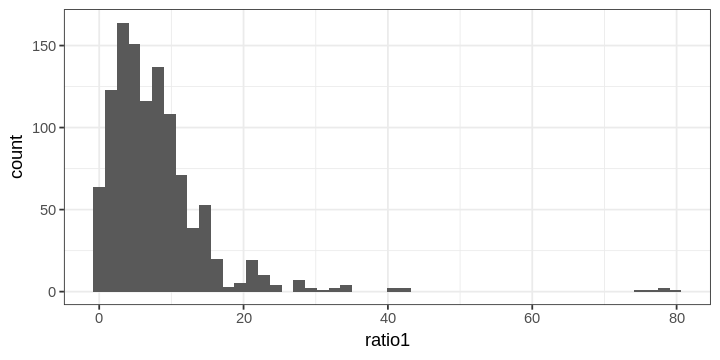

In [30]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=ratio1)) + 
    geom_histogram(bins = 50) +  
    theme_bw()

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

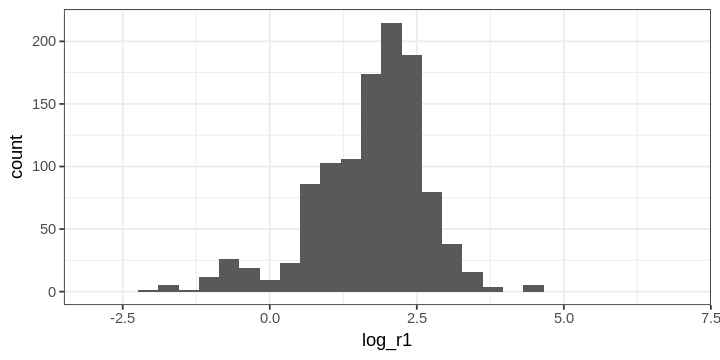

In [36]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=log_r1)) + 
    geom_histogram(bins = 30) +  
    xlim(-3, 7) +
    theme_bw()

In [15]:
data.frame(X=c(1,NA,1), Y=c(NA,2,10)) %>% replace(is.na(.), 0)

X,Y
1,0
0,2
1,10


In [26]:
dat = mat %>% gather(Sample, Value) %>% replace(is.na(.), 1)
dim(dat)

[1] 8076    2

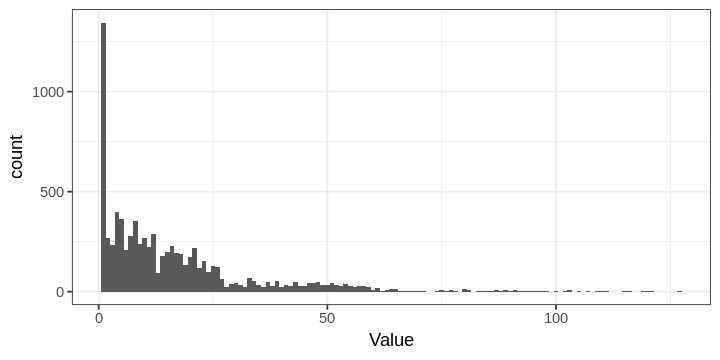

In [27]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=Value)) + geom_histogram(binwidth = 1) + theme_bw()

In [41]:
df <- data.frame(A=c(3,4,5),B=c(0,6,8),C=c(9,NA,1))
df

A,B,C
3,0,9
4,6,NA
5,8,1


In [42]:
df %>% mutate(Mean=rowMeans(., na.rm=TRUE))

A,B,C,Mean
3,0,9,4.000000
4,6,NA,5.000000
5,8,1,4.666667


In [44]:
df %>% t %>% as.data.frame

,V1,V2,V3
A,3,4,5
B,0,6,8
C,9,NA,1


In [51]:
mu = rowMeans(df, na.rm=TRUE)
mu = as.list(mu)
names(mu) = paste0("V", 1:3)
mu

$V1
[1] 4

$V2
[1] 5

$V3
[1] 4.666667

In [54]:
df %>% t %>% as.data.frame %>% replace_na(mu) %>% t %>% as.data.frame

,A,B,C
V1,3,0,9
V2,4,6,5
V3,5,8,1


In [57]:
data.frame(rnorm(100)) %>% t %>% as.data.frame

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
rnorm.100.,0.6956862,1.017536,0.1826399,-0.7247549,-1.438575,0.129607,0.5811685,0.1013351,-0.1907254,1.849256,...,-0.2279457,-0.6149592,-0.4595619,-1.16265,1.086208,1.601806,-0.07667429,-0.2131986,0.05086637,0.3513796


In [77]:
mu = rowMeans(mat, na.rm=TRUE)
mu = as.list(mu)
names(mu) = paste0("V", 1:length(mu))
length(mu)

[1] 2019

In [78]:
tail(mu)

$V2014
[1] 10

$V2015
[1] 10

$V2016
[1] 10

$V2017
[1] 10

$V2018
[1] 10

$V2019
[1] 10

In [80]:
tmp = mat %>% t %>% as.data.frame %>% replace_na(mu) %>% t %>% as.data.frame

In [81]:
tail(mat)

TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
NA,NA,NA,10
NA,NA,NA,10
NA,NA,NA,10
NA,NA,NA,10
NA,NA,NA,10
NA,NA,NA,10


In [82]:
tail(tmp)

,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
V2014,10,10,10,10
V2015,10,10,10,10
V2016,10,10,10,10
V2017,10,10,10,10
V2018,10,10,10,10
V2019,10,10,10,10


In [83]:
dat = tmp %>% gather(Sample, Value)
dim(dat)

[1] 8076    2

In [84]:
any(is.na(dat))

[1] FALSE

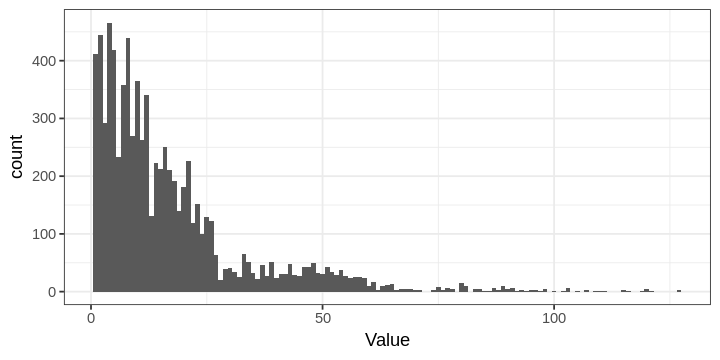

In [85]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=Value)) + geom_histogram(binwidth = 1) + theme_bw()

In [86]:
summary(dat$Value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    5.00   12.00   17.06   21.00  127.00 

In [87]:
var(dat$Value)

[1] 286.4163

In [83]:
dat_cnt_input = dat_cnt_input_per1 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(Input1, Input2, Input3, Input4, Input5))),
        Mean  = mean(c(Input1, Input2, Input3, Input4, Input5), na.rm = TRUE),
        Var   =  var(c(Input1, Input2, Input3, Input4, Input5), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    ) 

In [84]:
dat_cnt_dmso = dat_cnt_dmso_per1 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))),
        Mean  = mean(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE),
        Var   =  var(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [85]:
dat_cnt_dex = dat_cnt_dex_per1 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex))),
        Mean  = mean(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex), na.rm = TRUE),
        Var   =  var(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [15]:
head(dat_cnt_input)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,cnt_na,Mean,Var,log10mu,log10var
chr17,8148000,8148750,2,NA,3,7,4,1,4.0,4.666667,0.6020600,0.6690068
chr17,8148005,8148755,1,1,3,6,4,0,3.0,4.500000,0.4771213,0.6532125
chr17,8148010,8148760,1,1,3,6,3,0,2.8,4.200000,0.4471580,0.6232493
chr17,8148015,8148765,1,1,3,5,3,0,2.6,2.800000,0.4149733,0.4471580
chr17,8148020,8148770,1,3,4,5,3,0,3.2,2.200000,0.5051500,0.3424227
chr17,8148025,8148775,1,3,5,5,3,0,3.4,2.800000,0.5314789,0.4471580


In [20]:
table(dat_cnt_input$cnt_na)


   0    1    2    3    4 
1412  505  226   74   19 

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 19 rows containing missing values (geom_point).”

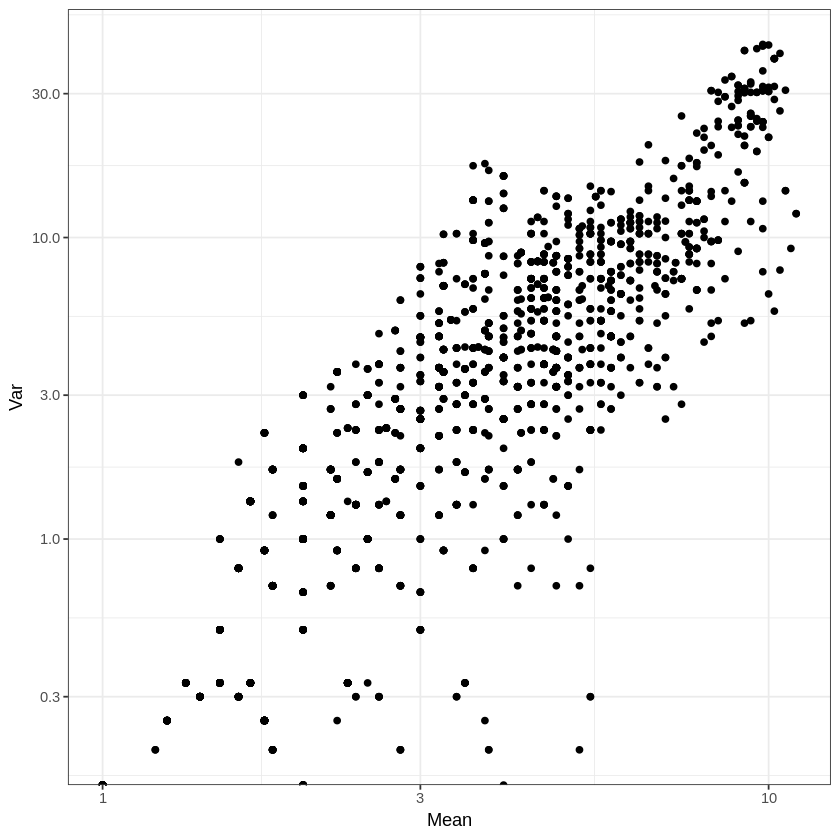

In [10]:
ggplot(dat_cnt_input, aes(x=Mean, y=Var)) + 
geom_point() + 
scale_x_log10() + 
scale_y_log10() + 
theme_bw()

In [24]:
df = dat_cnt_input %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25))
qs

0%       25%       50%       75%      100% 
0.0000000 0.3424227 0.5314789 0.6812412 1.0413927

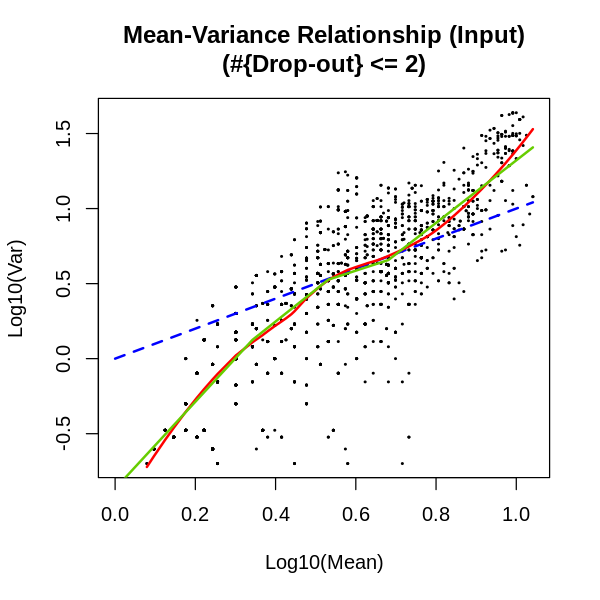

In [28]:
### arrange data and set knots for piecewise linear regression
df = dat_cnt_input %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     cex=0.3,
     main="Mean-Variance Relationship (Input)\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)")

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
#legend(0.05, 0.8, 
#       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
#       col=c("blue", "chartreuse3", "red"), 
#       lty=c(2, 1, 1), 
#       cex=0.7,
#       box.lty=0,
#       y.intersp=2)

In [87]:
df = dat_cnt_dmso %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25))
qs

0%      25%      50%      75%     100% 
0.000000 0.903090 1.113943 1.301030 1.851258

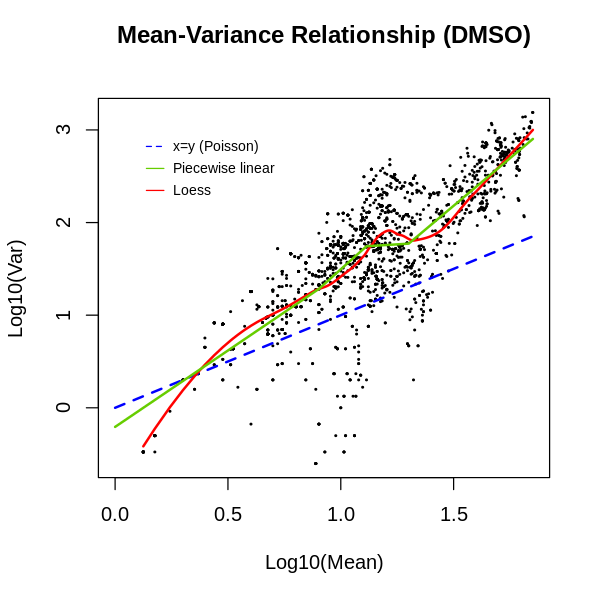

In [90]:
### arrange data and set knots for piecewise linear regression
df = dat_cnt_dmso %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     cex=0.3,
     main="Mean-Variance Relationship (DMSO)\n", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)")

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.1, 3, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

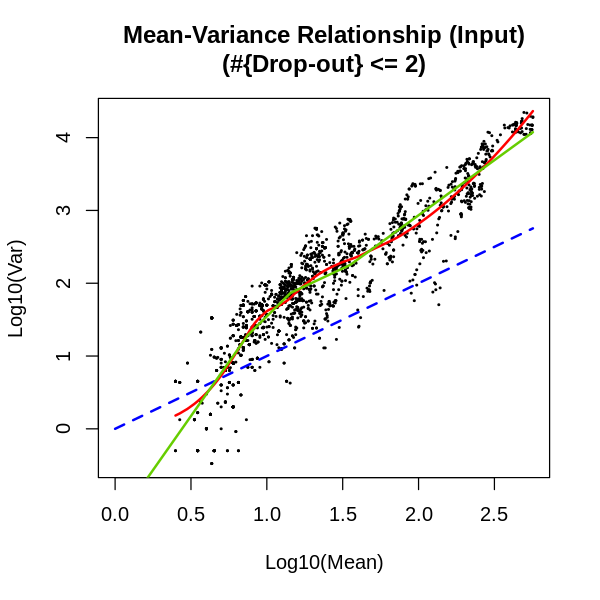

In [31]:
### arrange data and set knots for piecewise linear regression
df = dat_cnt_dex %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     cex=0.3,
     main="Mean-Variance Relationship (Input)\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)")

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
#legend(0.05, 0.8, 
#       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
#       col=c("blue", "chartreuse3", "red"), 
#       lty=c(2, 1, 1), 
#       cex=0.7,
#       box.lty=0,
#       y.intersp=2)